# OpenCV Image Processing 2
* Image operation
* Histogram

## Image operation

In [1]:
import cv2
import numpy as np

a = np.uint8([[200,50]])
b = np.uint8([[100,100]])

## numpy
add1 = a+b
sub1 = a-b
mult1 = a*2
div1 = a/3

## opencv
add2 = cv2.add(a,b)
sub2 = cv2.subtract(a,b)
mult2 = cv2.multiply(a,2)
div2 = cv2.divide(a,3)

print("Numpy, OpenCV")
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

## MASKING
a = np.array([[1,2]], dtype=np.uint8)
b = np.array([[10,20]], dtype=np.uint8)
mask = np.array([[1,0]], dtype=np.uint8)

c1 = cv2.add(a,b, None, mask)
print("b:", b)
c2 = cv2.add(a, b, b, mask)
print("b:", b)

print("c1:", c1)
print("c2:", c2)

Numpy, OpenCV
[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]
b: [[10 20]]
b: [[11 20]]
c1: [[11  0]]
c2: [[11 20]]


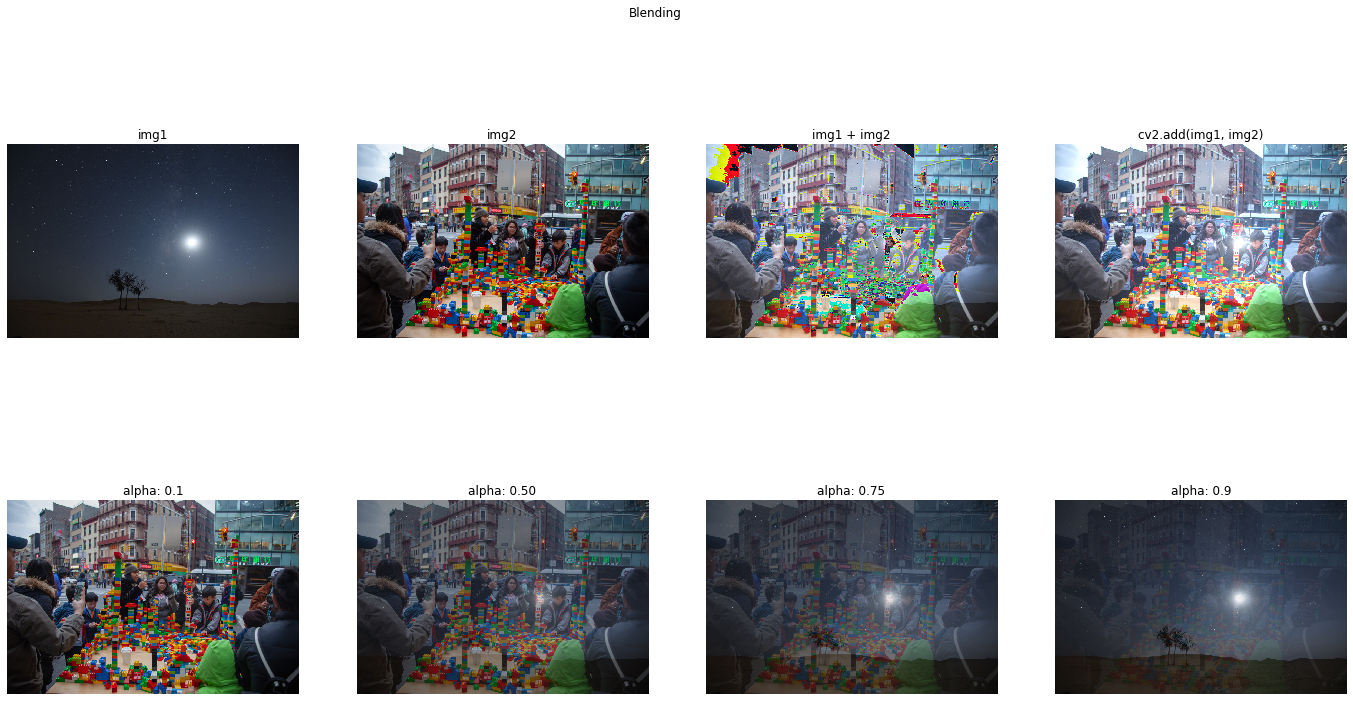

In [2]:
"""
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/c/c1/Abu_Dhabi_Desert.jpg'
filename = './image/desert.jpg'
urllib.request.urlretrieve(url, filename)
url = 'https://www.streetlab.org/wp-content/uploads/2018/10/32_2018-10-26-173701_doyersstplz_1080px.jpg'
filename = './image/block.jpg'
urllib.request.urlretrieve(url, filename)
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./image/desert.jpg')
img2 = cv2.imread('./image/block.jpg')

img3 = img1 + img2
img4 = cv2.add(img1, img2)
alpha = 0.10
img5 = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
alpha = 0.50
img6 = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
alpha = 0.75
img7 = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
alpha = 0.90
img8 = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
imgs = {'img1': img1, 'img2': img2, 'img1 + img2': img3, 'cv2.add(img1, img2)': img4,
       'alpha: 0.1': img5, 'alpha: 0.50': img6, 'alpha: 0.75': img7, 'alpha: 0.9': img8}

plt.figure(figsize=(24,12))
plt.suptitle('Blending')
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')

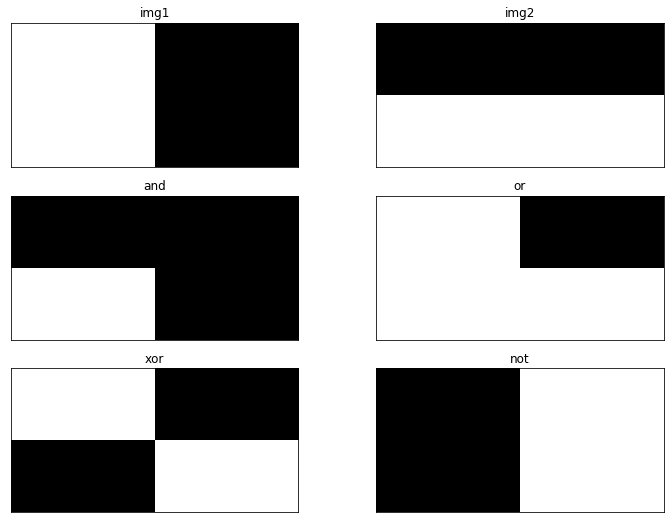

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:,:200] = 255
img2[100:200,:] = 255

bit_and = cv2.bitwise_and(img1, img2)
bit_or = cv2.bitwise_or(img1, img2)
bit_xor = cv2.bitwise_xor(img1, img2)
bit_not = cv2.bitwise_not(img1)

imgs = {'img1' : img1, 'img2': img2, 'and': bit_and, 
        'or': bit_or, 'xor': bit_xor, 'not': bit_not}

plt.figure(figsize=(12,9))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.imshow(v, 'gray')
    plt.title(k)
    plt.xticks([]); plt.yticks([])

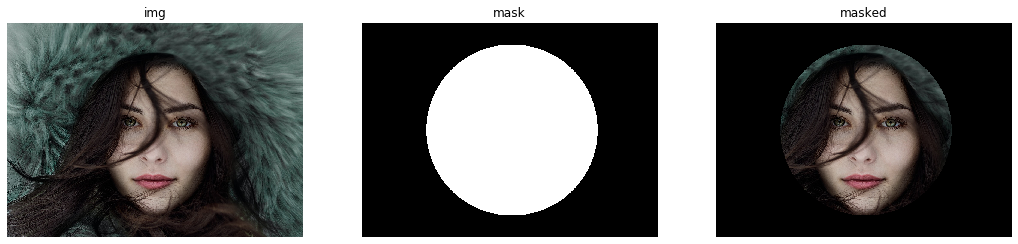

In [39]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1485178575877-1a13bf489dfe?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1382&q=80'
filename = './image/fur_hood.jpg'
urllib.request.urlretrieve(url, filename)
"""

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./image/fur_hood.jpg')

mask = np.zeros_like(img)
cv2.circle(mask, (700,500), 400, (255,255,255), -1)

masked = cv2.bitwise_and(img, mask)

imgs = {'img': img, 'mask': mask, 'masked': masked}
plt.figure(figsize=(18,6))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.title(k)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))